In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score,roc_curve, roc_auc_score


In [36]:
credit_card_data = pd.read_csv('credit_card.csv')

In [27]:
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [28]:
legit_sample = legit.sample(n=492)
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [29]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
model = RandomForest()
model.fit(X_train, Y_train)

In [41]:
# Model Evaluation
# Accuracy Score
training_data_accuracy = accuracy_score(model.predict(X_train), Y_train)
test_data_accuracy = accuracy_score(model.predict(X_test), Y_test)

# F1 Score
f1 = f1_score(Y_test, model.predict(X_test))

# Precision
precision = precision_score(Y_test, model.predict(X_test))

# Recall
recall = recall_score(Y_test, model.predict(X_test))

In [33]:
print('Accuracy on Training data : ', training_data_accuracy)
print('Accuracy score on Test Data : ', test_data_accuracy)
print('F1 Score : ', f1)
print('Precision : ', precision)
print('Recall : ', recall)

Accuracy on Training data :  0.9466327827191868
Accuracy score on Test Data :  0.9137055837563451
F1 Score :  0.9119170984455959
Precision :  0.9263157894736842
Recall :  0.8979591836734694


In [38]:

# Confusion Matrix
conf_mat = confusion_matrix(Y_train, model.predict(X_train))
print('Confusion Matrix:\n', conf_mat)

Confusion Matrix:
 [[382  11]
 [ 31 363]]


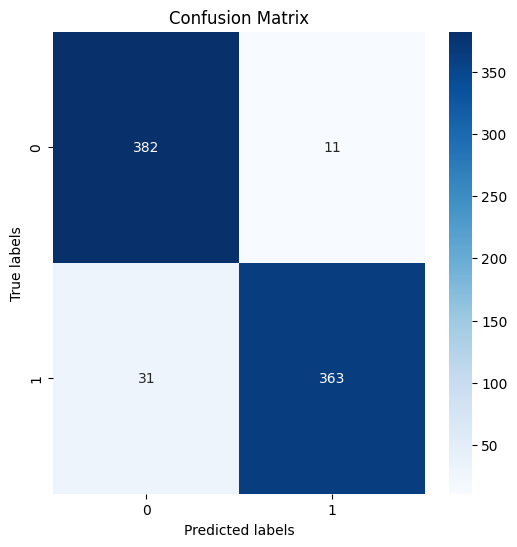

In [39]:
# Plotting Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

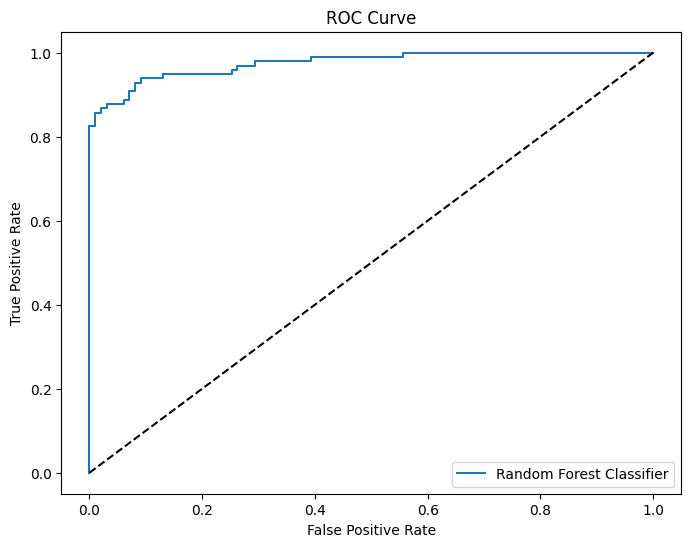

In [44]:
# ROC curve
plt.figure(figsize=(8, 6))
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
plt.plot(fpr, tpr, label='Random Forest Classifier')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()